In [1]:
from fastai.vision import *
import warnings
warnings.filterwarnings('ignore')

In [25]:
# 10 catégories de champignons différentes : Agaric Champetre, Cepe d été, Chanterelle en tube, Coprin chevelu, Coulemelle, Girolle, Lactaire délicieux,Morille, Pied bleu, Trompette de la mort.
# Pour toutes les catégories : environs 200 images (apres le trie)

# séparation en 150 - 50 pour train - test

# ne pas exécuter !!!!!
# download_images(urls="race/agaric_champetre.txt", dest="train/agaric_champetre", max_pics=200)
# download_images(urls="race/cepe_d_ete.txt", dest="train/cepe_d_ete", max_pics=200)
# download_images(urls="race/girolle.txt", dest="train/girolle", max_pics=200)
# download_images(urls="race/pied_bleu.txt", dest="train/pied_bleu", max_pics=200)
# download_images(urls="race/coprin_chevelu.txt", dest="train/coprin_chevelu", max_pics=200)
# download_images(urls="race/trompette_de_la_mort.txt", dest="train/trompette_de_la_mort", max_pics=200)
# download_images(urls="race/chanterelle_en_tube.txt", dest="train/chanterelle_en_tube", max_pics=200)
# download_images(urls="race/lactaire_délicieux.txt", dest="train/lactaire_délicieux", max_pics=200)
# download_images(urls="race/morille.txt", dest="train/morille", max_pics=200)
# download_images(urls="race/coulemelle.txt", dest="train/coulemelle", max_pics=200)

In [2]:
classes = ['agaric_champetre','cepe_d_ete','girolle','pied_bleu','coprin_chevelu','trompette_de_la_mort','chanterelle_en_tube','lactaire_délicieux','morille','coulemelle']


In [4]:
for c in classes:
    verify_images("train/"+c, delete=True)

In [5]:
data = ImageDataBunch.from_folder(path="",train="train", test="test", valid_pct=0.25, ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)

In [6]:
# utilisation du model resnet50, apres different essaie c'est qui donne le meilleur resultat
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [7]:
# recherche du lr
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-04
Min loss divided by 10: 5.75E-03


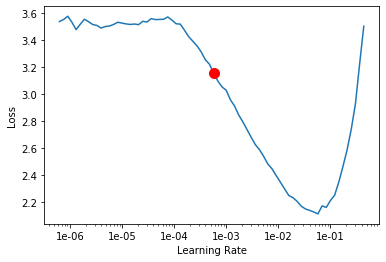

In [8]:
learn.recorder.plot(suggestion=True)
lr = learn.recorder.min_grad_lr
# celui etant plutot petit (ordre du 10^-4), il faudra plusieurs cycle d entrainement (environ 5-6)

In [9]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.287335,0.634158,0.780973,00:35
1,1.282942,0.540776,0.827434,00:35
2,0.845576,0.480932,0.853982,00:35
3,0.612282,0.435656,0.860619,00:35
4,0.492610,0.441159,0.858407,00:35


In [10]:
# 5e cycles : l'accuracy a un petit peu diminué tandis que le train loss et valid loss sont tres proche. On ne fera donc pas de fit tuning ici
# les resultas varient entre 82 et 89% (celui utilisé sur le site web) en fonction des reapartion d images train et test

In [11]:
# prediction
preds,y,losses = learn.get_preds(with_loss=True)

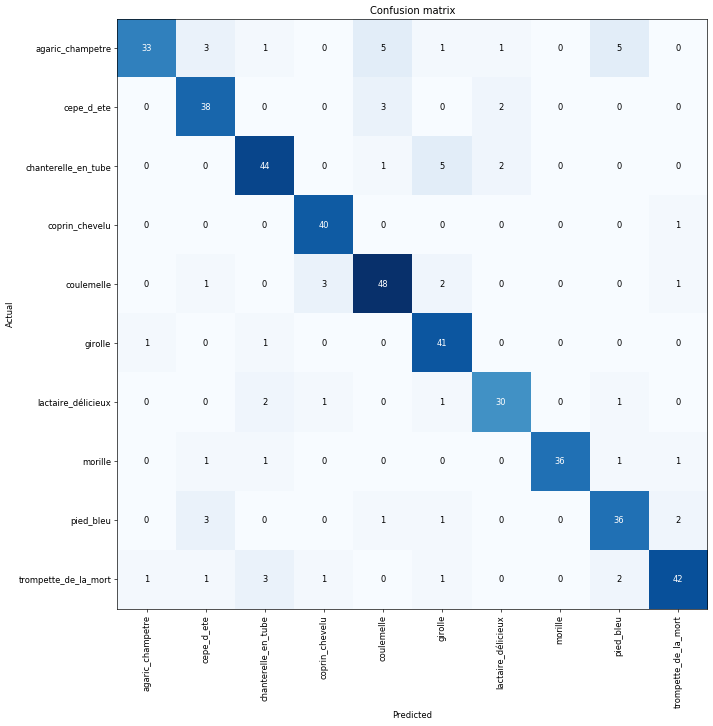

In [13]:
# recherche des confusions
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [14]:
interp.most_confused(3)

[('agaric_champetre', 'coulemelle', 5),
 ('agaric_champetre', 'pied_bleu', 5),
 ('chanterelle_en_tube', 'girolle', 5),
 ('agaric_champetre', 'cepe_d_ete', 3),
 ('cepe_d_ete', 'coulemelle', 3),
 ('coulemelle', 'coprin_chevelu', 3),
 ('pied_bleu', 'cepe_d_ete', 3),
 ('trompette_de_la_mort', 'chanterelle_en_tube', 3)]

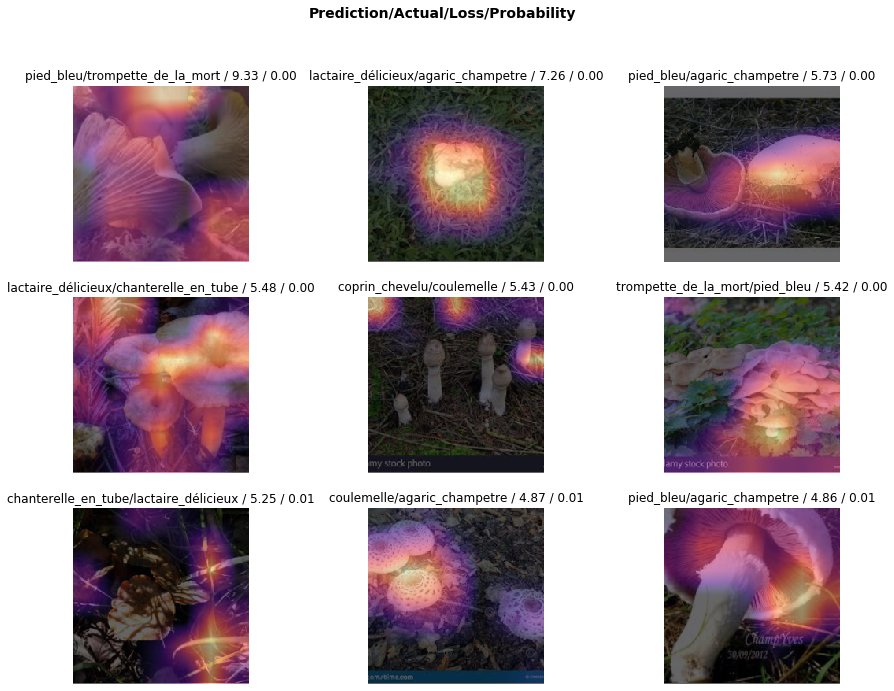

In [15]:
# on s'apercoie que le model a tendance a avoir du mal a reconnaitre le champignon agaric_champetre
# cela peut etre du a un jeu donnée pas tres efficace ou là la ressemble avec d'autre champigons

# pour recherche un peu plus, on affiche les images avec la plus mauvaise prediction

interp.plot_top_losses(9,figsize=(15,11), heatmap=True)

In [16]:
# effectivement certaine images laisse a désirer, on y voie mal le champignon dessus.

In [22]:
# export du model
learn.export()